In [3]:
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

import matplotlib as mpl
import matplotlib.pyplot as pl

In [4]:
path='C:/Users/Rukhsana/Desktop/Heriot-watt university/Coursework/F21DL/FOOD-DATA-GROUP.csv'
df=pd.read_csv(path)

In [5]:
df = df.drop("food", axis=1)
features = df.drop("Caloric Value", axis=1).columns.tolist()
target = "Caloric Value"
# Drop target as it is not needed in clustering
df = df.drop(target, axis=1)

In [6]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Transform the data
df_transformed = pt.fit_transform(df)

# Convert back to DataFrame
df = pd.DataFrame(df_transformed, columns=df.columns)

In [7]:
df['Protein+Carbohydrates+Fat'] = df['Protein']+df['Carbohydrates']+df['Fat']

In [8]:
selected_features = ['Nutrition Density', 'Monounsaturated Fats', 'Phosphorus', 'Calcium', 'Sodium', 'Vitamin B11', 'Dietary Fiber', 'Copper', 'Selenium', 'Protein+Carbohydrates+Fat']
X = df[selected_features]

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
cluster_range=list(range(2,8))
silhouette_avg=[]

for num in cluster_range:
    kmeans=KMeans(n_clusters=num)
    kmeans.fit(X)

    cluster_labels=kmeans.predict(X)

    silhouette_avg.append(silhouette_score(X,cluster_labels))

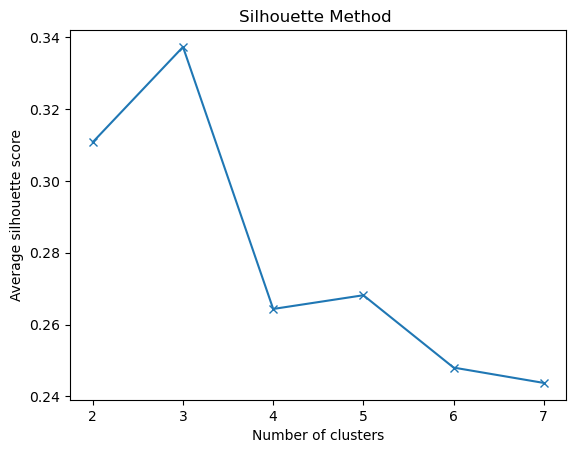

In [10]:
pl.plot(cluster_range, silhouette_avg, marker='x')
pl.xlabel('Number of clusters')
pl.ylabel('Average silhouette score')
pl.title('Silhouette Method ')
pl.show()